# **Inicio del AB FINAL**

## **Preparacion de los datos**

En este caso, se ha decidido crear este dataframe unificando todos los CSV en un único DataFrame y añadir una columna que identifique el origen (por ejemplo, source_id). Ya que la otra es crear un diccionario con cada csv separado, pero la custion es que las estructuras de columnas son muy parecidas y no paraece que se vaya a necesitar tratamientos específicos por fichero, si no mas bien en conjunto.

Por ello, se considera que es mas optima esta opción de unificar todos los datos en el mismo Dataframe

### Ruta de los *csv*

In [1]:
# Instalar dependencias necesarias
import subprocess
import sys

packages = [
    "pandas",
    "numpy", 
    "openpyxl",
    "matplotlib",
    "seaborn",
    "scikit-learn",
    "scipy",
    "cmdstanpy",
    "pystan",
    "prophet"
]

for package in packages:
    try:
        __import__(package.replace("-", "_"))
        print(f"✓ {package} ya está instalado")
    except ImportError:
        print(f"Instalando {package}...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])
            print(f"✓ {package} instalado correctamente")
        except subprocess.CalledProcessError:
            print(f"⚠️ Error instalando {package}, continuando...")

✓ pandas ya está instalado
✓ numpy ya está instalado
✓ openpyxl ya está instalado
✓ matplotlib ya está instalado
✓ seaborn ya está instalado
Instalando scikit-learn...
✓ scikit-learn instalado correctamente
✓ scipy ya está instalado
✓ cmdstanpy ya está instalado
Instalando pystan...


c:\Users\PABLO PC\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


⚠️ Error instalando pystan, continuando...
✓ prophet ya está instalado


In [2]:
import pandas as pd
from pathlib import Path
import re
import glob

### **Función de ingerta de datos**

En este caso, tras invesigar, encontre la funcion ***glob***, la cual busca un patron en comun al cual comparar en una ruta especificada y a partir de ahi, extrae todas las rutas cojn dicho patron. Por ello, para insertar todos los csv, hare una función que busque archivos acabados en "*.csv*".

Además, haré un bucle con un for para recorrer y comprobar que se hayan descargado y leido los datos correctamente.

#### ***Merge de los csv***

Una vez ya nos hemos asegurado de que todos los csv estan preparados para juntarlos en el mismo Dataframe, toca juntarlos propiamente en el mismo Dataframe para trabajar a posteriori con ellos.

Además, como vimos en el resultado de la celda anterior, hay muchas columnas llamadas Unnamed, las cuales no tienen nada de información dentro, por lo que a la hora de crear el Dataframe, lo solucionare eliminando todas estas columnas que no necesitamos y solo ensucian el Dataframe.



>  # Resultados de la celda anterior
    AguaEmbalsada_RioCofio_LaAcena.csv
    Columnas:['anio', 'mes', 'hec_cub', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']
    ---------------------------------------------------------------
    Archivo: AguaEmbalsada_RioGuadalix_Pedrezuela.csv
    Columnas: ['anio', 'mes', 'hec_cub', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']quote



Además, para la nueva columna para el Dataframe, he decidido que el contenido de dicha columna, en vez de ser la ruta de donde se han importados los datos, sea mejor directamente el nombre del embalse de donde se han sacado los datos. Esto, lo he hecho mediante la siguiente forma:



>   # Añadir columna con el nombre del archivo:
    nombre = Path(archivo).stem
    embalse = nombre.split("_")[-1]          
    df["embalse"] = embalse









#### **Comparacion de los csv**

Una vez que ya se que se han leido todos los csv correctamente, quiero comparar las columnas de los distintos *csv*, ya que para poder fusionar en un mismo Dataframe todos los datos, necesitamos asegurarnos de que se van a apilar correectamente y no se van a generear columnbas indeseadas por que ciertas columnas se llamen de forma distinta, como por ejemplo:  

*   La columna se llama ***Año***
*   La columna se llama ***Fecha***

Además, he estado teniendo un mismo error a la hora de leer los datos, ya que me salia que:


    UnicodeDecodeError                        Traceback (most recent call last)
    /tmp/ipython-input-2309794888.py in <cell line: 0>()
          5
          6 for archivo in CSVs:
    ----> 7   df_temp = pd.read_csv(archivo, nrows=0, sep=";")
          8   columnas_por_archivo[archivo.split("/")[-1]] = list(df_temp.columns)
          9

    5 frames
    parsers.pyx in pandas._libs.parsers.TextReader.__cinit__()

    parsers.pyx in pandas._libs.parsers.TextReader._get_header()

    parsers.pyx in pandas._libs.parsers.TextReader._tokenize_rows()

    parsers.pyx in pandas._libs.parsers.TextReader._check_tokenize_status()

    parsers.pyx in pandas._libs.parsers.raise_parser_error()

    /usr/lib/python3.12/codecs.py in decode(self, input, final)

    UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 8059: invalid continuation byte *texto en cursiva*




Esto indica que alguno de los CSV no está en *UTF-8*, sino probablemente en *Latin-1 (ISO-8859-1)*, cosa que al parecer es muy comun en ficheros Españoles, por lo que he metido un segundo intento de lectura con ***encoding="latin-1"*** si falla con ***UTF-8.***


#### **Función de Ingesta**

In [3]:
ruta = "data/"
archivos = sorted(glob.glob(ruta + "*.csv"))
print(f"Archivos encontrados: {len(archivos)}")
for archivo in archivos:
    print(f"  - {Path(archivo).name}")

Archivos encontrados: 14
  - AguaEmbalsada_RioCofio_LaAcena.csv
  - AguaEmbalsada_RioGuadalix_Pedrezuela.csv
  - AguaEmbalsada_RioGuadarrama-Aulencia_LaJorosa.csv
  - AguaEmbalsada_RioGuadarrama-Aulencia_Navalmedio.csv
  - AguaEmbalsada_RioGuadarrama-Aulencia_Valmayor.csv
  - AguaEmbalsada_RioJarama_ElVado.csv
  - AguaEmbalsada_RioLosMorales_LosMorales.csv
  - AguaEmbalsada_RioLozoya_ElAtazar.csv
  - AguaEmbalsada_RioLozoya_ElVillar.csv
  - AguaEmbalsada_RioLozoya_LaPinilla.csv
  - AguaEmbalsada_RioLozoya_PuentesViejas.csv
  - AguaEmbalsada_RioLozoya_Riosequillo.csv
  - AguaEmbalsada_RioManzanares_Navacerrada.csv
  - AguaEmbalsada_RioManzanares_Santillana.csv


In [4]:
def cargar_df_embalses(archivos):
    """
    Lee archivos csv desde la carpeta 'data/', los limpia y los merge en un único DataFrame.
    
    Pasos:
    1) Inspecciona y compara columnas
    2) Lee, limpia y mergea en df_embalses
    
    Devuelve df_embalses.
    """

    # -------- Inspeccionar columnas --------
    columnas_por_archivo = {}

    for archivo in archivos:
        try:
            df_temp = pd.read_csv(archivo, nrows=0, sep=";", encoding="utf-8")
        except UnicodeDecodeError:
            df_temp = pd.read_csv(archivo, nrows=0, sep=";", encoding="latin-1")
        
        columnas_por_archivo[Path(archivo).name] = list(df_temp.columns)

    # Mostrar columnas de cada archivo
    for nombre, columnas in columnas_por_archivo.items():
        print("\nArchivo:", nombre)
        print("Columnas:", columnas)

    # Comparar todas las columnas con las del primer archivo
    referencia = list(columnas_por_archivo.values())[0]

    print("\n" + "="*50)
    print("Comparación con la referencia:")
    print("Archivo de referencia:", list(columnas_por_archivo.keys())[0])
    print("="*50)

    for nombre, columnas in columnas_por_archivo.items():
        if columnas == referencia:
            print("✅", nombre, "tiene las mismas columnas")
        else:
            print("⚠️", nombre, "tiene columnas diferentes")
            print("   Columnas diferentes:", set(columnas).symmetric_difference(set(referencia)))

    # -------- Leer, limpiar y mergear --------
    lista_df = []
    columnas_referencia = None

    print("\n" + "="*50)
    print(f"Iniciando merge de {len(archivos)} archivos...")
    print("="*50)

    for archivo in archivos:
        try:
            df = pd.read_csv(archivo, sep=";", encoding="utf-8")
        except UnicodeDecodeError:
            df = pd.read_csv(archivo, sep=";", encoding="latin-1")

        # Eliminar columnas basura tipo "Unnamed: X"
        df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])

        # Añadir columna con el nombre del embalse
        nombre = Path(archivo).stem
        embalse = nombre.split("_")[-1]
        df["embalse"] = embalse

        # Registrar columnas de referencia del primer archivo
        if columnas_referencia is None:
            columnas_referencia = list(df.columns)
            print("Columnas de referencia:", columnas_referencia)

        lista_df.append(df)
        print(f"✓ Leído: {Path(archivo).name}")

    # Concatenar todo
    df_embalses = pd.concat(lista_df, ignore_index=True, sort=False)

    print("\n" + "="*50)
    print("Merge completado.")
    print(f"Filas totales: {len(df_embalses)}")
    print(f"Columnas totales: {len(df_embalses.columns)}")
    print(f"Columnas finales: {list(df_embalses.columns)}")
    print("="*50)

    return df_embalses

In [5]:
if len(archivos) == 0:
    print("⚠️ No hay archivos .xlsx en la carpeta 'data/'")
    print("Por favor, coloca tus archivos Excel en: data/")
    df_embalses = None
else:
    df_embalses = cargar_df_embalses(archivos)


Archivo: AguaEmbalsada_RioCofio_LaAcena.csv
Columnas: ['anio', 'mes', 'hec_cub', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']

Archivo: AguaEmbalsada_RioGuadalix_Pedrezuela.csv
Columnas: ['anio', 'mes', 'hec_cub', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']

Archivo: AguaEmbalsada_RioGuadarrama-Aulencia_LaJorosa.csv
Columnas: ['anio', 'mes', 'hec_cub', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']

Archivo: AguaEmbalsada_RioGuadarrama-Aulencia_Navalmedio.csv
Columnas: ['anio', 'mes', 'hec_cub', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']

A

In [6]:
if df_embalses is not None:
    df_embalses
else:
    print("Esperando a que carguen los datos...")

In [7]:
if df_embalses is not None:
    # De esta forma, usando el iloc, podemos ver si realmente estan mezclados bien los datos
    print(df_embalses.iloc[1500:2003] if len(df_embalses) > 2003 else df_embalses.head())

      anio      mes hec_cub     embalse
1500  2001    enero  48,188      ElVado
1501   NaN  febrero   44,14      ElVado
1502   NaN    marzo  47,388      ElVado
1503   NaN    abril  47,857      ElVado
1504   NaN     mayo  37,695      ElVado
...    ...      ...     ...         ...
1998  2018    enero   0,553  LosMorales
1999   NaN  febrero   0,524  LosMorales
2000   NaN    marzo   0,996  LosMorales
2001   NaN    abril   1,545  LosMorales
2002   NaN     mayo   1,836  LosMorales

[503 rows x 4 columns]


In [8]:
df_embalses.dtypes

anio       object
mes        object
hec_cub    object
embalse    object
dtype: object

## **Limpieza de la base de datos**

### Contexto

Una cosa a tener en cuenta, es que para este trabajo, hemos pensado usar el algoritmo de prediccion de serie temporales Prophet, por lo cual la base de datos deberá estar preferentemente para la facilidad del entrenamiento del algortimo en un estilo, en el que los embalses sea las columnas y sus datos se rellenen con las cantidades de agua medidas en cada mes y año.

### Limpieza técnica

#### Normalización de los meses con diccionario

Ahora, ya que debe estar en formato numerico, ya lo quiera pasar mas adelante a un tipo de dato Datetype, o no, el modelo lee solamente numeros, por lo cual, debo pasarlo de los meses ***"enero", "febrero", etc...*** a los nombres de los meses a formato numérico ***"01", "02"***...

In [9]:
# Diccionario de meses → número con padding de dos dígitos
mes_map = {
    "enero": "01",
    "febrero": "02",
    "marzo": "03",
    "abril": "04",
    "mayo": "05",
    "junio": "06",
    "julio": "07",
    "agosto": "08",
    "septiembre": "09",
    "setiembre": "09",   # por seguridad
    "octubre": "10",
    "noviembre": "11",
    "diciembre": "12"
}

# Normalizamos y reemplazamos directamente la columna 'mes'
df_embalses["mes"] = (
    df_embalses["mes"]
    .astype(str)
    .str.strip()
    .str.lower()
    .map(mes_map)
)

# Comprobación rápida
df_embalses["mes"].head(15)


0     01
1     02
2     03
3     04
4     05
5     06
6     07
7     08
8     09
9     10
10    11
11    12
12    01
13    02
14    03
Name: mes, dtype: object

#### Limpieza de columnas inecesarias

Una vez tenemos la base de datos en este estado, hemos decidido extraer el actual estado de la base de datos ya que se pueden ver claramente ciertos aspectos raros n la base de datos como datos nulos, y aprovechando que trabajamos con una base de datos pequeña, importare la propia base de datos actual a un csv para poder visualizar de forma mas clara para ver si hay algún dato raro.

Aun asi, esto solo se puede hacer ya que es una base de datos relativamente pequeña. Por ello, también mostraremos el como poder visualizar si hay ruido en el csv sin este método tan circunstancial y poco util para bases de dato más grandes.

In [10]:
# Guarda la versión actual del DataFrame
# df_embalses.to_csv("df_embalses_actual_2.0.csv", index=False, encoding="utf-8")

# files.download("df_embalses_actual_2.0.csv")

Aqúí como podemos ver, en el csv, hay datos raros los cuales mediante una breve investigación, lleguamos a la siguiente conclusión:


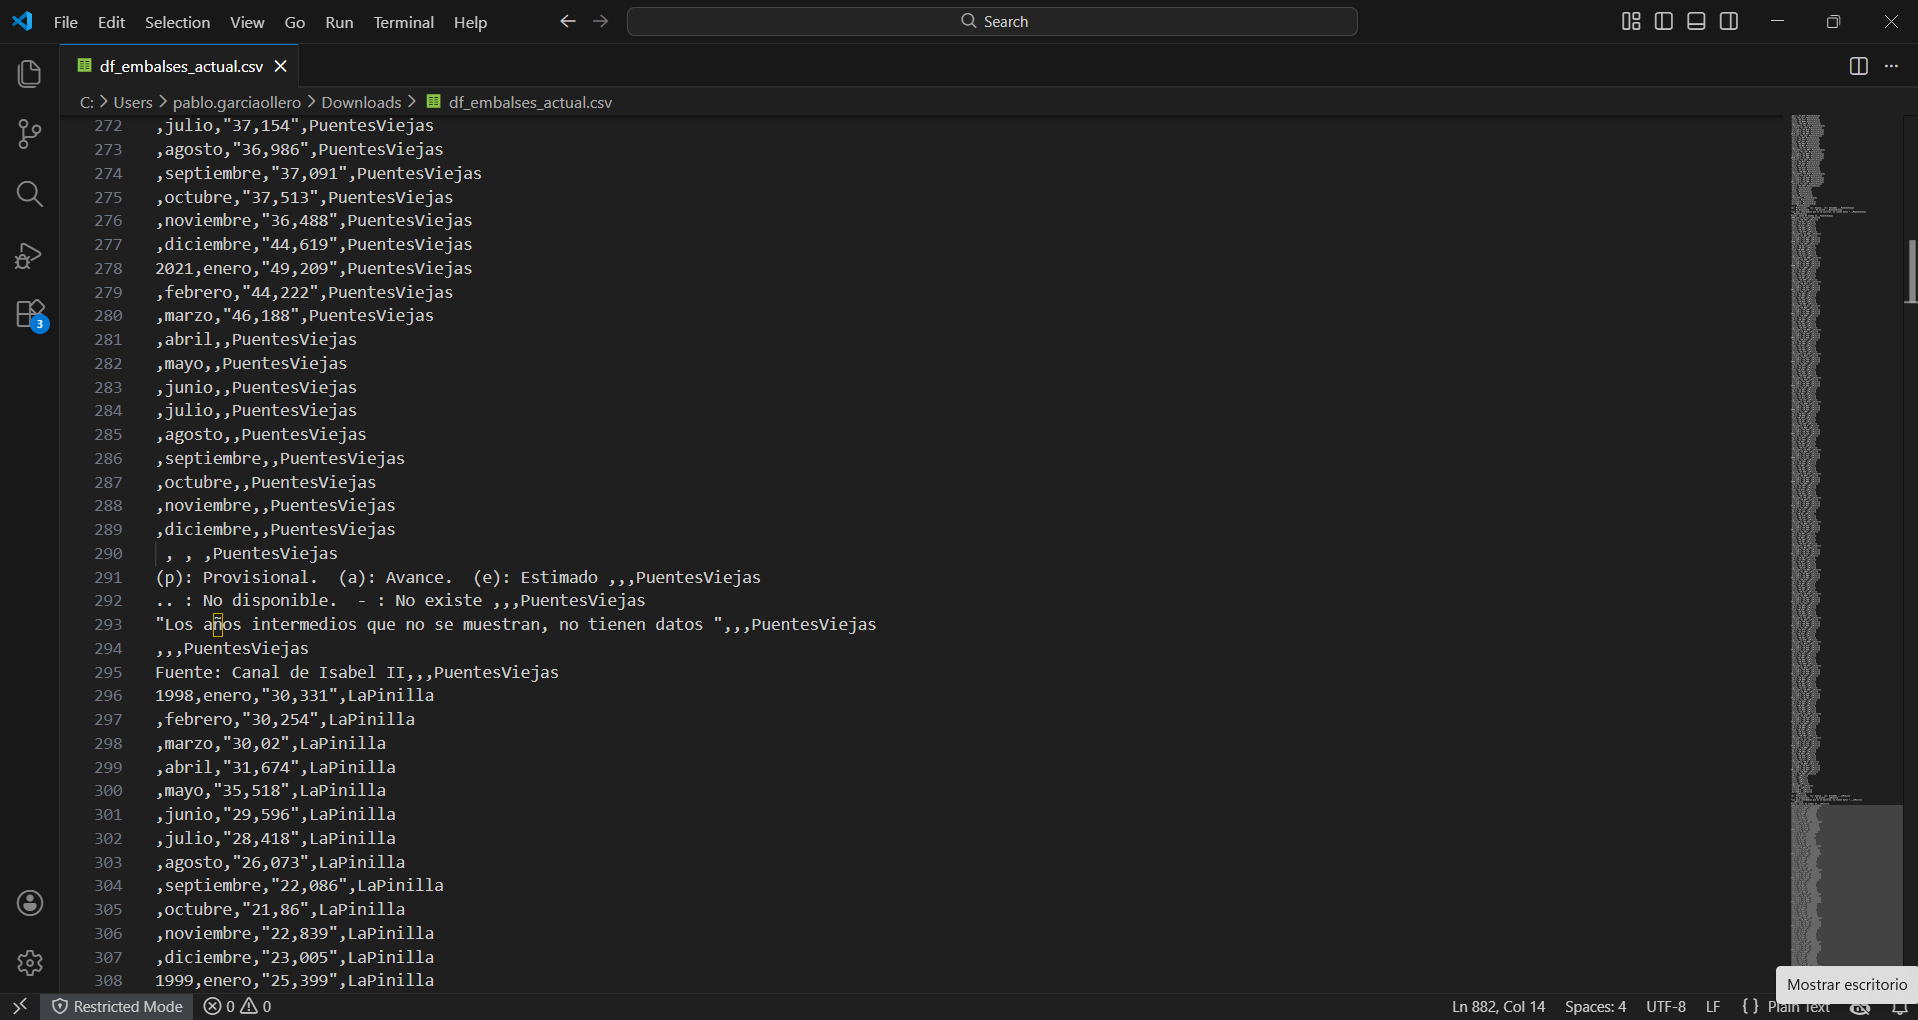

  **El CSV viene de un scraping o extracción de datos desde PDFs o HTML del Canal de Isabel II.**

    El problema es que los documentos del Canal incluyen:
    

*   Mensajes de nota: "Fuente: Canal de Isabel II"

*   Notas al pie: "(p): Provisional", "(a): Avance"

*   Textos de ayuda: "Los años intermedios…"

*   Filas con celdas vacías que el parser tradujo como ,, , (Valores Nan)

*   Valores que el OCR detectó como texto

*   Cabeceras entre años mezcladas con las filas

*   Columnas duplicadas como filas como las de ano, mes, hec_cub y embalse   (Debido probablemente al metodo usado de insertar los csv juntos)

Es decir, el<
> dataset no está limpio y contiene partes del documento original metidas dentro del CSV como si fueran filas, las cuales se traducen como ruido para el dataset.

Okay, ahora, somos conscientes que esta mal la base de datos. Además, quieremos pasar a tenerlos nombres de los embalses como columnas y la informacion de las filas sea directamente los hec_cub correspondientes por mes y año, pero llegar a ese punto primero queremos limpiar lo maximo posible la base de datos de valores nulos, y esos encabezados que no nos sirven y solo aportan ruido para la base de datos

Ahora el proximo paso, es realmente verificar que la mayor parte del data set tiene la estructura que esperamos, asi que primero hacemos un df_embalses(type) para ver que tipo de datos tenemos y luego pasamos un bucle que recorra cada fila para asegurar de que tengamos valores adecuados para empezar a transformar la base de datos. Por lo cual, lo que hare será:

Revisar cada fila del dataset y comprobamos si cumple la estructura esperada:

*  anio numérico o NaN

*  mes dentro de la lista de meses válidos

*  hec_cub con formato numérico tipo xx,xxx o xx.xxx

*  embalse con texto no vacío

Solo se mantrendan las filas que cumplen esas reglas y eliminaremos todas las demás (texto basura, filas corruptas, notas, etc.).

Además, en el bucle añadiremos un metodo de verificacion con un contador para asegurar de que se estan leyendo las filas corectamente una a una.



In [11]:
import numpy as np

# Paso 1: convertir todo a string y limpiar espacios
df_embalses["anio"] = df_embalses["anio"].astype(str).str.strip()

# Paso 2: reemplazar cadenas vacías o espacios por NaN
df_embalses["anio"] = df_embalses["anio"].replace({"": np.nan, " ": np.nan})

# Paso 3: quitar el ".0"
df_embalses["anio"] = df_embalses["anio"].str.replace(".0", "", regex=False)

# Paso 4: si aparece algo no numérico, convertirlo en NaN
df_embalses["anio"] = pd.to_numeric(df_embalses["anio"], errors="coerce")

# Paso 5: finalmente a Int64
df_embalses["anio"] = df_embalses["anio"].astype("Int64")

df_embalses["anio"].head(20)


0     1998
1     <NA>
2     <NA>
3     <NA>
4     <NA>
5     <NA>
6     <NA>
7     <NA>
8     <NA>
9     <NA>
10    <NA>
11    <NA>
12    1999
13    <NA>
14    <NA>
15    <NA>
16    <NA>
17    <NA>
18    <NA>
19    <NA>
Name: anio, dtype: Int64

Todos estos pasos son esenciales, ya que sorprendentemente hay datos irregulares, los cuales los años se introducen como un float escrito así: ***2006.0, 2011.0, 2015.0,*** etc, lo cual supone problemas a la hora de hacer posteriormente filtros para eliminar filas inecesarias y el pivoteo de la tabla.

 Por ello, es mejor simplemente pasar todo como un ***string***, eliminar ***los .0*** y volver a pasar todo como un ***int***

In [12]:
print("Filas totales iniciales:", len(df_embalses))

# AHORA meses_validos tienen que ser los códigos "01".."12"
meses_validos = {f"{i:02d}" for i in range(1, 13)}  # {"01","02",...,"12"}

patron_hec = re.compile(r"^\d+([,.]\d+)?$")

contador = {"n": 0}

def fila_valida(fila):
    contador["n"] += 1

    anio = fila["anio"]
    mes = str(fila["mes"]).strip()      # ya viene como "01".."12", no hace falta lower()
    hec = str(fila["hec_cub"]).strip()
    embalse = str(fila["embalse"]).strip()

    # 1) Validar año
    if (not pd.isna(anio)) and (not str(anio).isdigit()):
        return False

    # 2) Validar mes: ahora comprobamos contra {"01","02",...,"12"}
    if mes not in meses_validos:
        return False

    # 3) Validar formato hec_cub
    if not patron_hec.match(hec):
        return False

    # 4) Validar embalse
    if len(embalse) < 2:
        return False

    return True

columnas_buenas = ["anio", "mes", "hec_cub", "embalse"]
df_embalses = df_embalses[columnas_buenas].copy()

mask_validas = df_embalses.apply(fila_valida, axis=1)

print("Filas evaluadas por fila_valida:", contador["n"])
print("Filas válidas:", mask_validas.sum())
print("Filas NO válidas (eliminadas):", (~mask_validas).sum())

filas_rechazadas = df_embalses[~mask_validas].head(10)
display(filas_rechazadas)

df_embalses = df_embalses[mask_validas].reset_index(drop=True)

print("\nFilas finales tras limpiar:", len(df_embalses))
df_embalses.head(10)


Filas totales iniciales: 4076
Filas evaluadas por fila_valida: 4076
Filas válidas: 3876
Filas NO válidas (eliminadas): 200


,anio,mes,hec_cub,embalse
279,<NA>,04,NaN,LaAcena
280,<NA>,05,NaN,LaAcena
281,<NA>,06,NaN,LaAcena
282,<NA>,07,NaN,LaAcena
283,<NA>,08,NaN,LaAcena
284,<NA>,09,NaN,LaAcena
285,<NA>,10,NaN,LaAcena
286,<NA>,11,NaN,LaAcena
287,<NA>,12,NaN,LaAcena
567,<NA>,04,NaN,Pedrezuela



Filas finales tras limpiar: 3876


,anio,mes,hec_cub,embalse
0,1998,01,"23,891",LaAcena
1,<NA>,02,"23,816",LaAcena
2,<NA>,03,"23,245",LaAcena
3,<NA>,04,"23,35",LaAcena
4,<NA>,05,"23,678",LaAcena
5,<NA>,06,"21,947",LaAcena
6,<NA>,07,"18,924",LaAcena
7,<NA>,08,"15,802",LaAcena
8,<NA>,09,"13,085",LaAcena
9,<NA>,10,"11,208",LaAcena


In [13]:
# Guarda la versión actual del DataFrame
# df_embalses.to_csv("df_embalses_medio_limpio_7.csv", index=False, encoding="utf-8")

# files.download("df_embalses_medio_limpio_7.csv")

Ahora, para comprobar, en este caso, aunque ya hemos podido comprobar de que el estado de la base de datos ha mejorado, queremos asegurarnos de que los comentarios que mencionaba antes que estorbaban en la base de datos, ya no esten. Por ello, como segunda forma de asegurarnos, vamos a volover a descargar el csv, y comprobarlo.

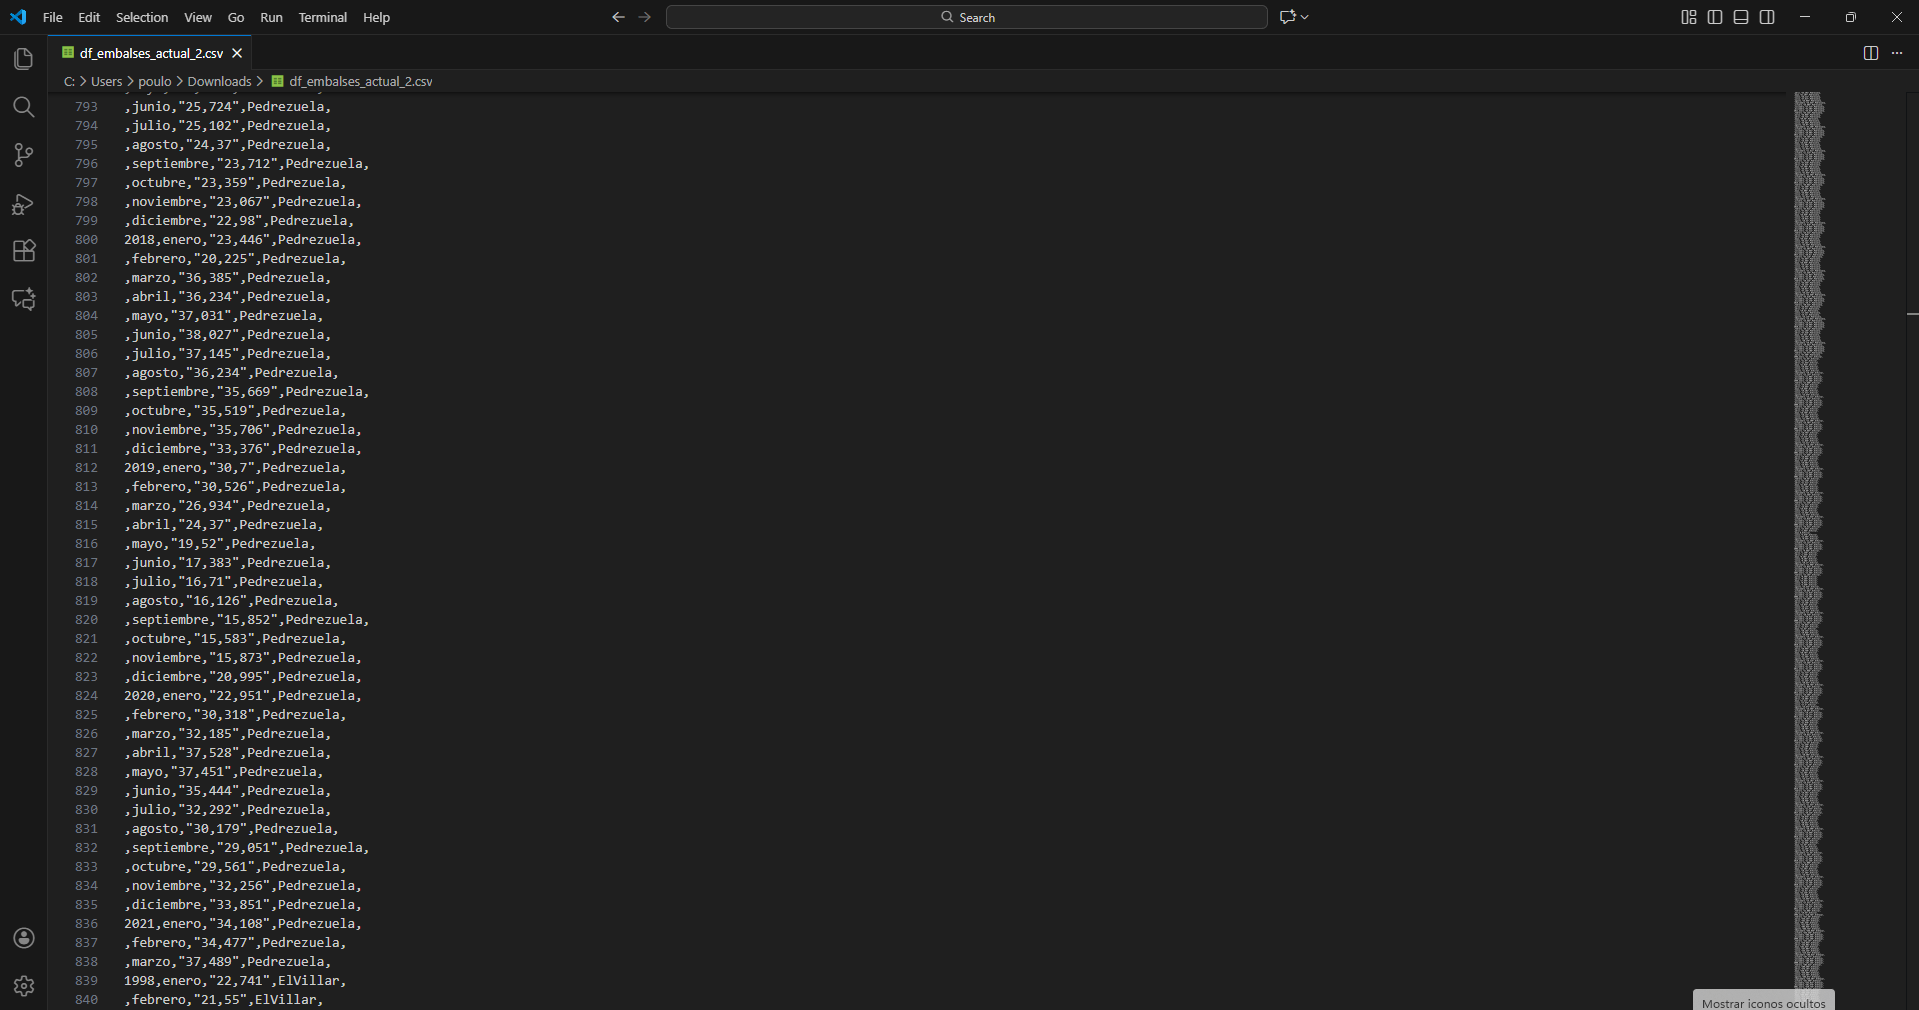


Y tal, como se esperaba, estos comentarios ya no estan.

In [14]:
df_embalses

,anio,mes,hec_cub,embalse
0,1998,01,"23,891",LaAcena
1,<NA>,02,"23,816",LaAcena
2,<NA>,03,"23,245",LaAcena
3,<NA>,04,"23,35",LaAcena
4,<NA>,05,"23,678",LaAcena
...,...,...,...,...
3871,<NA>,11,"72,051",Santillana
3872,<NA>,12,"80,703",Santillana
3873,2021,01,"84,763",Santillana
3874,<NA>,02,"82,427",Santillana


#### **Conversión Correcta de hec_cub**

Los valores vienen como texto ***("41,769", "44", "72,05")***, y aqui necesitamos convertirlos a ***float REALES***, usando punto decimal, manteniendo la coma como decimal.


In [15]:
# Convertimos coma decimal (ej: "41,769") a punto decimal ("41.769")
df_embalses["hec_cub"] = (
    df_embalses["hec_cub"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .str.strip()
)

# Convertimos definitivamente a float
df_embalses["hec_cub"] = pd.to_numeric(df_embalses["hec_cub"], errors="coerce")

# Comprobamos que funciona
df_embalses["hec_cub"].describe()


count    3876.000000
mean       47.720440
std        80.207739
min         0.000000
25%         6.232750
50%        22.324000
75%        44.131000
max       423.885000
Name: hec_cub, dtype: float64

In [16]:
df_embalses.iloc[2579: 2600]

,anio,mes,hec_cub,embalse
2579,<NA>,03,30.841,LaPinilla
2580,<NA>,04,30.098,LaPinilla
2581,<NA>,05,30.253,LaPinilla
2582,<NA>,06,29.327,LaPinilla
2583,<NA>,07,26.540,LaPinilla
2584,<NA>,08,23.204,LaPinilla
2585,<NA>,09,20.500,LaPinilla
2586,<NA>,10,16.954,LaPinilla
2587,<NA>,11,24.048,LaPinilla
2588,<NA>,12,30.762,LaPinilla


#### **Forward-fill del año**

Muchos años, vienen así,


```
1998, enero, ...
NaN, febrero, ...
NaN, marzo, ...

```

Y el foward Fill, rellenara esos Nan, con el año correcto, cogiendo el anterior disponible y duplicandolo, haciendo que se vea de la siguinte forma:

```
1998, enero, ...
1998, febrero, ...
1998, marzo, ...

```



In [17]:
# Rellenamos los NaN del año copiando el valor anterior
df_embalses["anio"] = df_embalses["anio"].ffill()

# Convertimos años a integer
df_embalses["anio"] = df_embalses["anio"].astype(int)

df_embalses.head(20)


,anio,mes,hec_cub,embalse
0,1998,01,23.891,LaAcena
1,1998,02,23.816,LaAcena
2,1998,03,23.245,LaAcena
3,1998,04,23.350,LaAcena
4,1998,05,23.678,LaAcena
5,1998,06,21.947,LaAcena
6,1998,07,18.924,LaAcena
7,1998,08,15.802,LaAcena
8,1998,09,13.085,LaAcena
9,1998,10,11.208,LaAcena


In [18]:
df_embalses.iloc[2579: 2600]

,anio,mes,hec_cub,embalse
2579,2006,03,30.841,LaPinilla
2580,2006,04,30.098,LaPinilla
2581,2006,05,30.253,LaPinilla
2582,2006,06,29.327,LaPinilla
2583,2006,07,26.540,LaPinilla
2584,2006,08,23.204,LaPinilla
2585,2006,09,20.500,LaPinilla
2586,2006,10,16.954,LaPinilla
2587,2006,11,24.048,LaPinilla
2588,2006,12,30.762,LaPinilla


#### **Pivotación de la tabla**

Ahora, para que el algoritmo de prediccion de series temporales, le sea mas facil de entnder los datos, se debe pivotar la tabla, para que en vez de tener columnas donde los datos de la cantidad de agua recogida se vean en la columna hect_cub, queremos que cada embalse, tenga sus propias medidas por mes y año, por lo que debemos hacer una columna por cada embalse. Es decir, transformar el Data Base, de formato ancho:

```
anio | mes | embalse | hec_cub

```

A formato largo:


```
anio | mes | PuentesViejas | ElAtazar | Navalmedio | ...

```





In [19]:
sorted(df_embalses["embalse"].unique())


['ElAtazar',
 'ElVado',
 'ElVillar',
 'LaAcena',
 'LaJorosa',
 'LaPinilla',
 'LosMorales',
 'Navacerrada',
 'Navalmedio',
 'Pedrezuela',
 'PuentesViejas',
 'Riosequillo',
 'Santillana',
 'Valmayor']

In [20]:
# 1) Pivot simple, sin rejilla
df_pivotada = df_embalses.pivot_table(
    index=["anio", "mes"],
    columns="embalse",
    values="hec_cub",
    aggfunc="mean"
).reset_index()

# 2) Ver cuántos valores tiene LaAcena en el pivot
print("Filas con datos en LaAcena (pivot):",
      df_pivotada["LaAcena"].notna().sum())

# 3) Ver algunas filas donde sí hay datos
# Esta lina esta mostrada de esta forma ya que tuve varios problemas por los cuales se me me perdian datos al pivotar la tabla.
# Finalemnete encontre el error, ya que habia algunos datos de años que no se pasaban bien, en la transformacion mas arriba.
# Esto, hacia que perdiera las filas con los años de alguno embalses, lo cual resultaba a la hora de hacer el pivot, que los  datos se perdian.
df_pivotada[df_pivotada["LaAcena"].notna()].head(15)


Filas con datos en LaAcena (pivot): 279


embalse,anio,mes,ElAtazar,ElVado,ElVillar,LaAcena,LaJorosa,LaPinilla,LosMorales,Navacerrada,Navalmedio,Pedrezuela,PuentesViejas,Riosequillo,Santillana,Valmayor
0,1998,01,326.784,45.882,22.741,23.891,6.572,30.331,2.373,10.062,0.182,38.413,41.769,45.782,76.953,118.990
1,1998,02,327.590,46.043,21.550,23.816,6.462,30.254,2.370,10.114,0.617,38.104,41.442,46.640,78.440,119.578
2,1998,03,336.267,39.928,21.670,23.245,6.848,30.020,2.363,9.966,0.500,33.449,40.911,45.965,78.067,119.063
3,1998,04,353.267,42.443,21.644,23.350,6.747,31.674,2.363,10.326,0.639,27.848,44.173,46.209,82.716,119.578
4,1998,05,391.448,49.165,21.925,23.678,7.041,35.518,2.338,10.989,0.625,23.009,50.395,43.954,85.453,120.833
5,1998,06,412.483,41.751,19.654,21.947,6.718,29.596,2.326,9.647,0.559,21.130,43.927,41.359,78.627,109.389
6,1998,07,405.935,24.442,12.448,18.924,6.072,28.418,2.212,7.982,0.643,14.083,43.706,43.338,77.602,95.295
7,1998,08,388.735,13.855,11.913,15.802,5.530,26.073,2.047,6.183,0.584,13.737,43.051,37.611,76.400,86.685
8,1998,09,366.046,8.980,10.276,13.085,5.881,22.086,0.984,5.051,0.336,12.905,42.358,34.818,76.216,81.990
9,1998,10,336.358,13.340,13.147,11.208,6.006,21.860,1.855,4.348,0.191,10.461,34.594,35.689,76.307,78.129


In [21]:
df_pivotada


embalse,anio,mes,ElAtazar,ElVado,ElVillar,LaAcena,LaJorosa,LaPinilla,LosMorales,Navacerrada,Navalmedio,Pedrezuela,PuentesViejas,Riosequillo,Santillana,Valmayor
0,1998,01,326.784,45.882,22.741,23.891,6.572,30.331,2.373,10.062,0.182,38.413,41.769,45.782,76.953,118.990
1,1998,02,327.590,46.043,21.550,23.816,6.462,30.254,2.370,10.114,0.617,38.104,41.442,46.640,78.440,119.578
2,1998,03,336.267,39.928,21.670,23.245,6.848,30.020,2.363,9.966,0.500,33.449,40.911,45.965,78.067,119.063
3,1998,04,353.267,42.443,21.644,23.350,6.747,31.674,2.363,10.326,0.639,27.848,44.173,46.209,82.716,119.578
4,1998,05,391.448,49.165,21.925,23.678,7.041,35.518,2.338,10.989,0.625,23.009,50.395,43.954,85.453,120.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2020,11,322.594,26.556,20.421,15.596,4.354,22.477,NaN,5.469,0.307,32.256,36.488,35.890,72.051,83.256
275,2020,12,328.937,45.859,21.617,19.546,5.248,28.493,NaN,8.305,0.321,33.851,44.619,38.857,80.703,96.598
276,2021,01,332.906,48.117,23.600,23.477,5.805,29.557,NaN,8.811,0.384,34.108,49.209,43.689,84.763,102.213
277,2021,02,331.279,45.471,22.006,23.414,6.134,28.946,NaN,8.859,0.351,34.477,44.222,47.479,82.427,117.166


In [22]:
df_pivotada.iloc[139: 144]

embalse,anio,mes,ElAtazar,ElVado,ElVillar,LaAcena,LaJorosa,LaPinilla,LosMorales,Navacerrada,Navalmedio,Pedrezuela,PuentesViejas,Riosequillo,Santillana,Valmayor
139,2009,08,359.636,10.070,19.946,12.909,5.053,26.108,0.493,4.808,0.384,19.606,2.954,39.532,56.187,84.423
140,2009,09,332.453,7.547,19.477,12.297,3.725,23.238,0.373,4.102,0.380,19.277,2.178,36.627,49.276,74.411
141,2009,10,310.221,7.416,17.183,10.037,4.200,20.687,0.307,3.405,0.393,19.177,1.955,34.671,44.723,64.380
142,2009,11,294.343,7.455,12.885,9.670,3.404,18.985,0.272,3.286,0.419,18.781,8.380,30.187,39.541,63.072
143,2009,12,280.180,16.164,13.036,9.598,2.812,24.048,0.264,4.031,0.406,16.211,20.636,20.719,42.281,66.681


In [23]:
# Pon aquí el DataFrame que quieres descargar:
# df_pivotada.to_csv("datos_exportados.csv", index=False, encoding="utf-8")

# Descargar al ordenador
# files.download("datos_exportados.csv")


Como podemos ver, ahora mismo ya esta bien preparado el dataset, pero, sin embargo como podemos ver, al embalse de LosMorales, le faltan datos desde 2020, por lo que mediante la siguiente linea de comando, podremos ver la primera fila completa donde aparece un NaN. Para así, saber hasta que fecha tenemos datos.

```
primer_nan = df_pivotada["LosMorales"].isna().idxmax()
primer_nan

```


In [24]:
primer_nan = df_pivotada["LosMorales"].isna().idxmax()
primer_nan
print("\n En esta línea deja de haber datos para el embalse LosMorales =", primer_nan, "\n")



 En esta línea deja de haber datos para el embalse LosMorales = 249 



In [25]:
# Imprimo solo para asegurarme de que es a partir de es punto que dejo de tener los datos
df_pivotada.iloc[245: 274]

embalse,anio,mes,ElAtazar,ElVado,ElVillar,LaAcena,LaJorosa,LaPinilla,LosMorales,Navacerrada,Navalmedio,Pedrezuela,PuentesViejas,Riosequillo,Santillana,Valmayor
245,2018,06,417.207,44.364,21.550,21.461,6.012,29.404,1.839,8.746,0.340,38.027,46.472,38.456,87.147,103.525
246,2018,07,411.022,30.972,21.258,19.526,4.898,27.048,1.727,7.705,0.387,37.145,42.907,35.239,79.096,103.394
247,2018,08,387.134,22.872,21.590,16.126,4.990,23.980,1.666,6.784,0.366,36.234,43.196,36.244,71.606,103.459
248,2018,09,361.351,17.826,21.550,13.623,4.721,21.158,1.617,6.099,0.357,35.669,43.317,37.428,66.030,103.262
249,2018,10,337.544,16.783,21.564,11.748,4.471,19.313,NaN,5.572,0.352,35.519,41.372,38.429,61.997,105.117
250,2018,11,326.337,26.099,21.737,12.869,4.656,26.938,NaN,6.853,0.335,35.706,44.074,38.589,68.616,106.257
251,2018,12,321.352,33.782,21.858,13.672,4.078,26.757,NaN,6.586,0.317,33.376,41.489,38.164,68.616,102.802
252,2019,01,320.998,35.470,21.258,13.222,4.057,26.395,NaN,5.844,0.371,30.700,40.047,37.533,67.317,98.357
253,2019,02,324.373,40.473,21.008,13.109,4.100,25.293,NaN,5.964,0.342,30.526,44.123,42.296,70.015,98.674
254,2019,03,330.827,31.325,19.015,12.166,3.589,28.305,NaN,5.621,0.305,26.934,41.980,41.585,71.339,97.663


Sabiendo, que es en la linea 249 donde dejamos de tener datos para este Embalse, ahora simplemente restando las 278 lineas que tenemos a estas 249, vemos como hay 29 filas en las que no contamos con datos para todos los embalses.

#### Relleno de datos

Para ello, ahora se hará una funcion la cual se encargue de coger la media por fecha de los últimos 3 años, para rellenar los datos faltantes con una aproximación optima.

In [26]:
import numpy as np
import pandas as pd

def rellenar_losmorales_historico():
    """
    Rellena SOLO los NaN del embalse LosMorales en df_pivotada
    usando un patrón histórico realista:
      1) Media de los últimos 3 años para ese mismo mes.
      2) Si no hay suficientes datos, media histórica de ese mes.
      3) Si tampoco hay, media global del embalse.
    Crea df_pivotada_rellena como copia modificada.
    """

    global df_pivotada

    df = df_pivotada.copy()

    # Asegurar tipos correctos
    df["anio"] = pd.to_numeric(df["anio"], errors="coerce").astype("Int64")
    df["mes"]  = pd.to_numeric(df["mes"],  errors="coerce").astype("Int64")

    embalse = "LosMorales"

    if embalse not in df.columns:
        print(f"⚠ La columna {embalse} no existe en df_pivotada.")
        return

    # NaN antes
    nan_antes = df[embalse].isna().sum()
    print(f"NaN en {embalse} ANTES de imputar: {nan_antes}")

    # Filas con NaN en LosMorales
    mask_nan = df[embalse].isna()
    filas_nan = df[mask_nan][["anio", "mes"]].copy().reset_index()

    if filas_nan.empty:
        print(f"✔ No hay NaN en {embalse}, no se modifica nada.")
        globals()["df_pivotada_rellena"] = df
        return

    # Datos válidos de LosMorales
    datos_validos = df[df[embalse].notna()]
    if datos_validos.empty:
        print(f"⚠ {embalse} no tiene datos válidos, no se puede imputar.")
        globals()["df_pivotada_rellena"] = df
        return

    # medias de fallback
    media_por_mes = datos_validos.groupby("mes")[embalse].mean().to_dict()
    media_global  = datos_validos[embalse].mean()

    # Rellenar cada NaN
    for _, row in filas_nan.iterrows():
        idx = row["index"]
        anio_f = row["anio"]
        mes_f  = row["mes"]

        # últimos 3 años para ese mes
        mask_rec = (
            (df["anio"] >= anio_f - 3) &
            (df["anio"] <  anio_f) &
            (df["mes"] == mes_f) &
            (df[embalse].notna())
        )
        candidatos = df.loc[mask_rec, embalse]

        if not candidatos.empty:
            val = candidatos.mean()
        elif mes_f in media_por_mes:
            val = media_por_mes[mes_f]
        else:
            val = media_global

        df.at[idx, embalse] = val

    nan_despues = df[embalse].isna().sum()
    print(f"NaN en {embalse} DESPUÉS de imputar: {nan_despues}")

    globals()["df_pivotada_rellena"] = df
    print("✔ df_pivotada_rellena creado (solo LosMorales modificado).")


In [27]:
rellenar_losmorales_historico()


NaN en LosMorales ANTES de imputar: 30
NaN en LosMorales DESPUÉS de imputar: 0
✔ df_pivotada_rellena creado (solo LosMorales modificado).


In [28]:
df_pivotada_rellena

embalse,anio,mes,ElAtazar,ElVado,ElVillar,LaAcena,LaJorosa,LaPinilla,LosMorales,Navacerrada,Navalmedio,Pedrezuela,PuentesViejas,Riosequillo,Santillana,Valmayor
0,1998,1,326.784,45.882,22.741,23.891,6.572,30.331,2.373000,10.062,0.182,38.413,41.769,45.782,76.953,118.990
1,1998,2,327.590,46.043,21.550,23.816,6.462,30.254,2.370000,10.114,0.617,38.104,41.442,46.640,78.440,119.578
2,1998,3,336.267,39.928,21.670,23.245,6.848,30.020,2.363000,9.966,0.500,33.449,40.911,45.965,78.067,119.063
3,1998,4,353.267,42.443,21.644,23.350,6.747,31.674,2.363000,10.326,0.639,27.848,44.173,46.209,82.716,119.578
4,1998,5,391.448,49.165,21.925,23.678,7.041,35.518,2.338000,10.989,0.625,23.009,50.395,43.954,85.453,120.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2020,11,322.594,26.556,20.421,15.596,4.354,22.477,0.898778,5.469,0.307,32.256,36.488,35.890,72.051,83.256
275,2020,12,328.937,45.859,21.617,19.546,5.248,28.493,0.828556,8.305,0.321,33.851,44.619,38.857,80.703,96.598
276,2021,1,332.906,48.117,23.600,23.477,5.805,29.557,0.825259,8.811,0.384,34.108,49.209,43.689,84.763,102.213
277,2021,2,331.279,45.471,22.006,23.414,6.134,28.946,0.945630,8.859,0.351,34.477,44.222,47.479,82.427,117.166


# **Visualización de datos**

### Gráficas del dataset

#### Preparación previa

**Creacion de la columna fecha y total para el Algoritmo de Prophet y otras gráficas**

Es necesario tener una columna con un estilo DateType, apra este algritmo de predicción de series temporales, por lo cual, ahroa que teneos la Data Base limpia, solo tendremos que coger las columnas de *"anio"* y *"mes"* y juntarlas para hecer esta columna nueva.

Al igua que la columna fecha, la columna total, sera muy necesaria no solo para el **Algoritmo Prophet**, si no tambien para las gráficas para entender mejor el Data Set, obtenidas gracias al propio Data Set.


***IMPORTANTE:***

En este caso, como no tenemos dia concreto del mes, simplemente se pondra que en todas las fechas hablamos del día 1 de cada mes

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Crea la fecha para el DataSet
df_pivotada_rellena["fecha"] = pd.to_datetime(
    df_pivotada_rellena["anio"].astype(str) + "-" + df_pivotada_rellena["mes"].astype(str) + "-01"
)

# Columnas de embalses = todas menos anio, mes, fecha
columnas_embalses = [c for c in df_pivotada_rellena.columns if c not in ["anio", "mes", "fecha"]]

# Suma total de agua embalsada al mes
df_pivotada_rellena["total"] = df_pivotada_rellena[columnas_embalses].sum(axis=1)

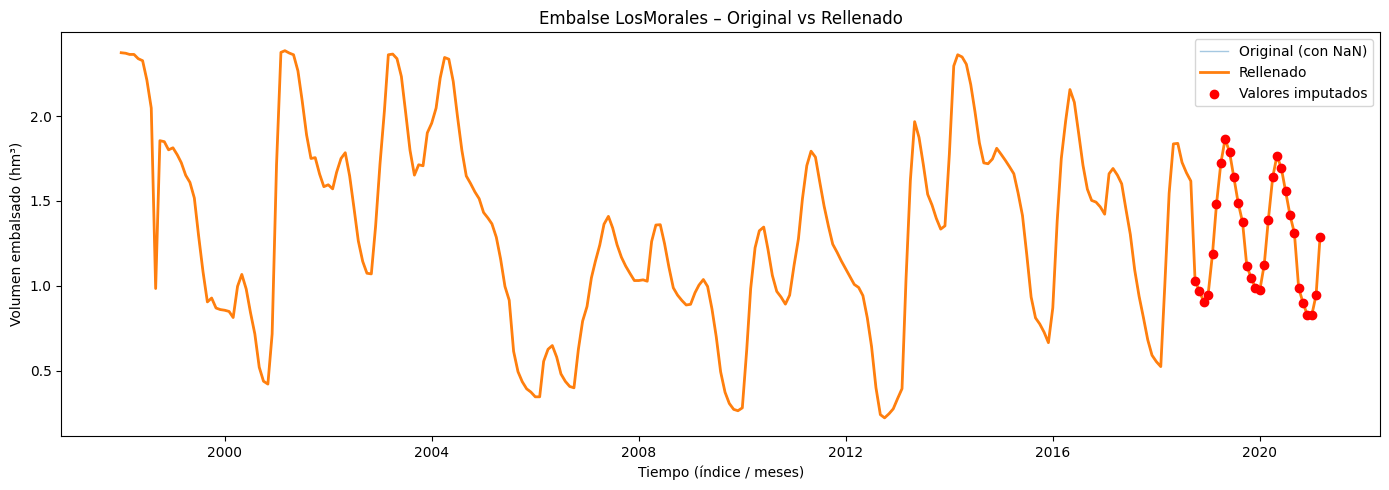

In [31]:

# Más cómodo si tienes columna fecha, pero si no, usamos el índice
x = df_pivotada.index

# Máscara de dónde había NaN originalmente
mask_imputado = df_pivotada["LosMorales"].isna()

plt.figure(figsize=(14, 5))

# Serie original (con huecos)
plt.plot(
    df_pivotada_rellena["fecha"],
    df_pivotada["LosMorales"],
    label="Original (con NaN)",
    alpha=0.4,
    linewidth=1
)

# Serie rellenada
plt.plot(
    df_pivotada_rellena["fecha"],
    df_pivotada_rellena["LosMorales"],
    label="Rellenado",
    linewidth=2
)

# Marcar solo los puntos imputados
plt.scatter(
    df_pivotada_rellena["fecha"][mask_imputado],
    df_pivotada_rellena.loc[mask_imputado, "LosMorales"],
    color="red",
    zorder=5,
    label="Valores imputados"
)

plt.title("Embalse LosMorales – Original vs Rellenado")
plt.xlabel("Tiempo (índice / meses)")
plt.ylabel("Volumen embalsado (hm³)")
plt.legend()
plt.tight_layout()
plt.show()



#### Gráficos ilustrativos

***Gráfico de barras por AÑO de TODOS los embalses***

Gracias a este gráfico, podeos responder a preguntas como: ¿Cuánta agua total hubo cada año en todos los embalses sumados?

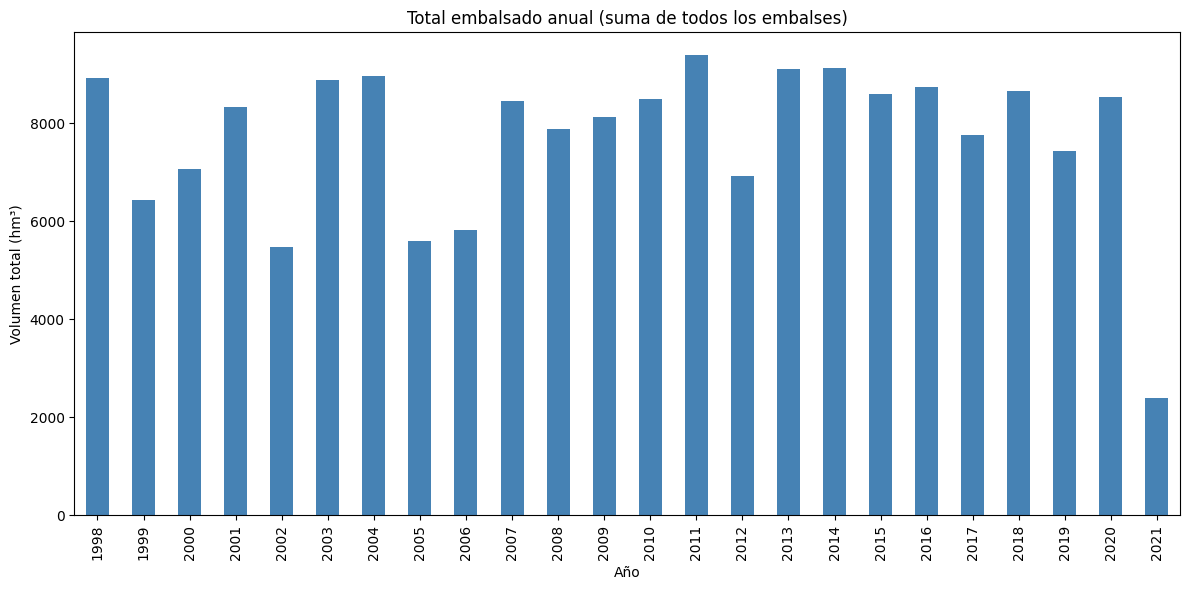

In [32]:
df_anual = df_pivotada_rellena.groupby("anio")[columnas_embalses].sum()

plt.figure(figsize=(12, 6))
df_anual.sum(axis=1).plot(kind="bar", color="steelblue")

plt.title("Total embalsado anual (suma de todos los embalses)")
plt.xlabel("Año")
plt.ylabel("Volumen total (hm³)")
plt.tight_layout()
plt.show()


Hay que tener en cuenta, que como hemos visto antes en el Data Set, tenemos ciertos embalses los cuales no tienen datos sobre 2021, como LosMorales, por lo cual no es raro el ver estos datos. Además, hay que recordar que para 2021, solo tenemos datos hasta Marzo, por lo cual nos quedaría por añadir todavía 9 meses de datos, para completar esta barra.

  Aun así, como conclusión, se puede ver como ciclicamente cada año aumenta y disminuye el volumen total, pero a su vez, aumenta generalmente el minimo de agua acumulada.

***Gráfico de barras por AÑO de cada embalse (cada embalse una barra por año)***

Este gráfico, es muy util en general para poder comparar embalses. Ya que puede uno, simplemente comparar dos embalses por sus niveles de agua a lo largo del tiempo. Esto sería muy util, si quisieramos agregar una columna de Localidad/Comunidad autonoma/Localización, para poder identificar que embalses tienen mayor y menor acumulación de agua y en que zona geograficas están situados.

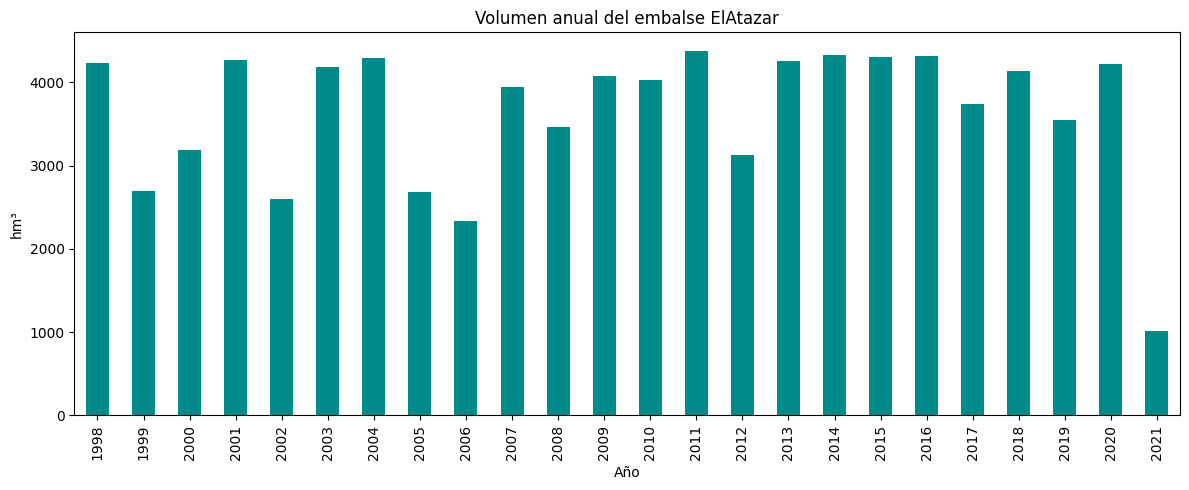

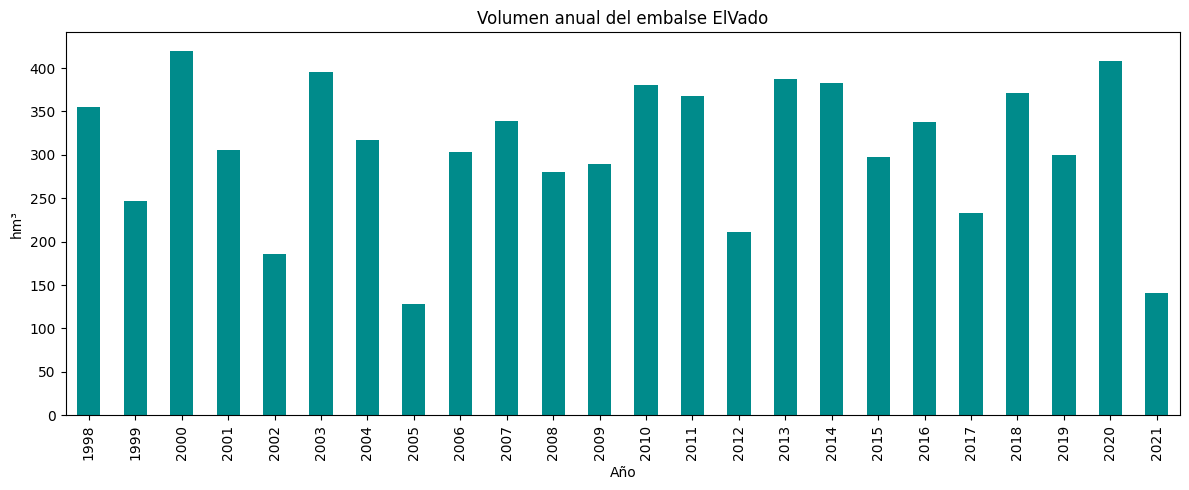

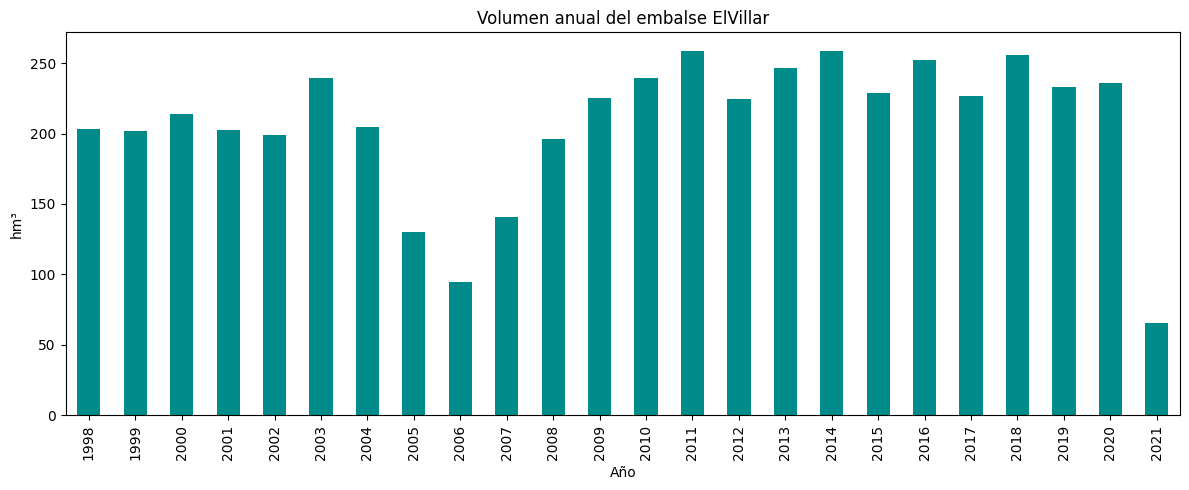

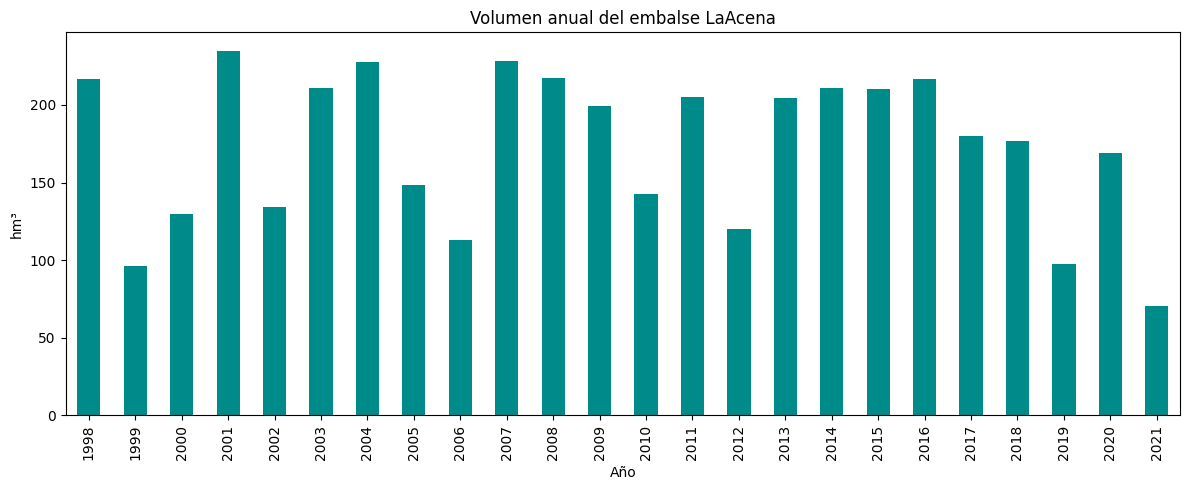

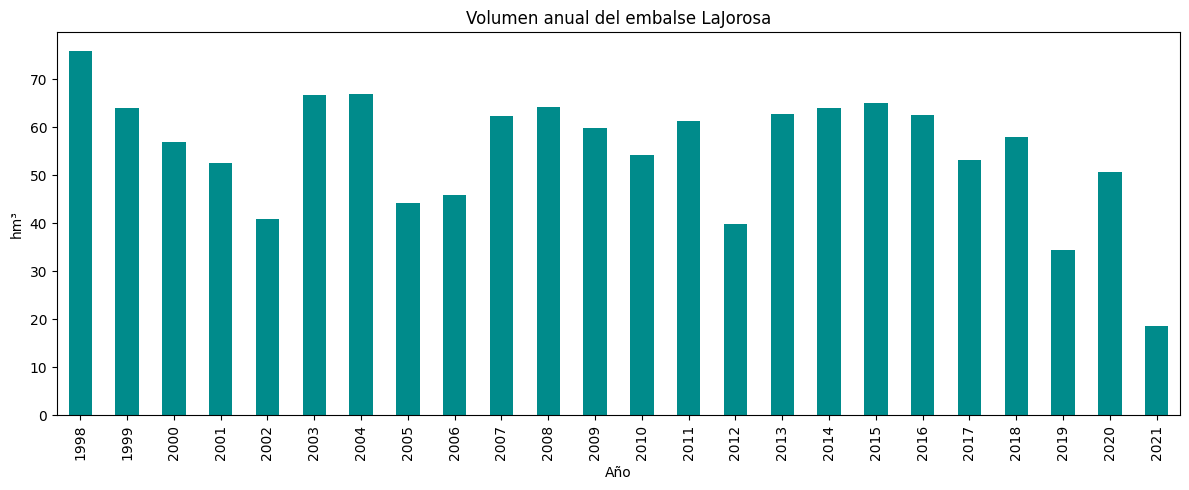

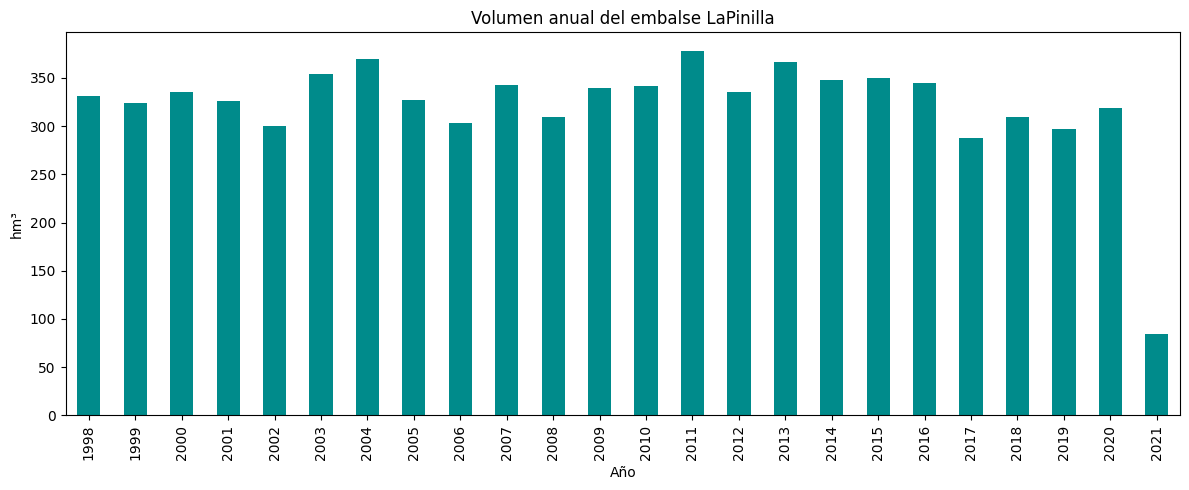

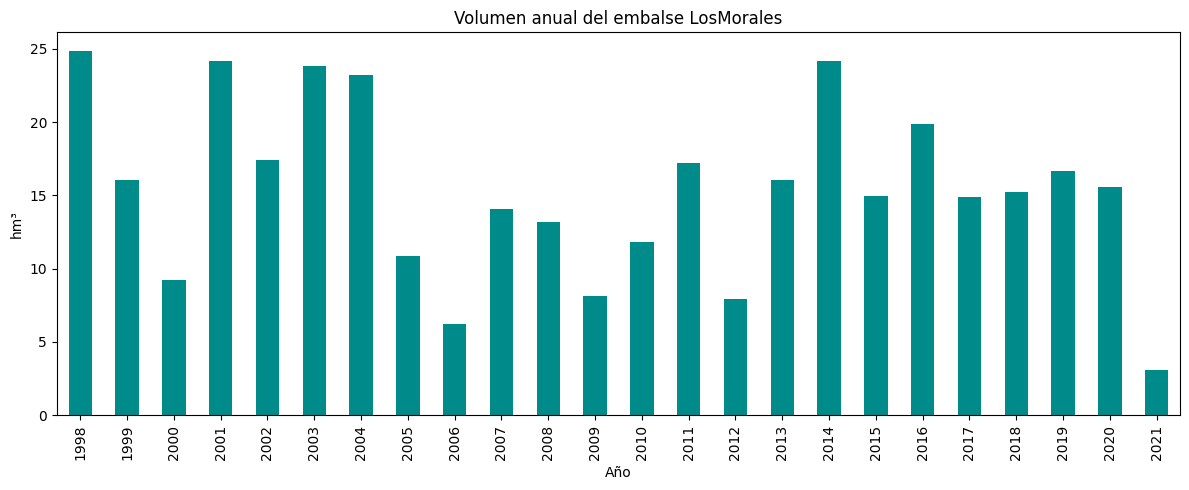

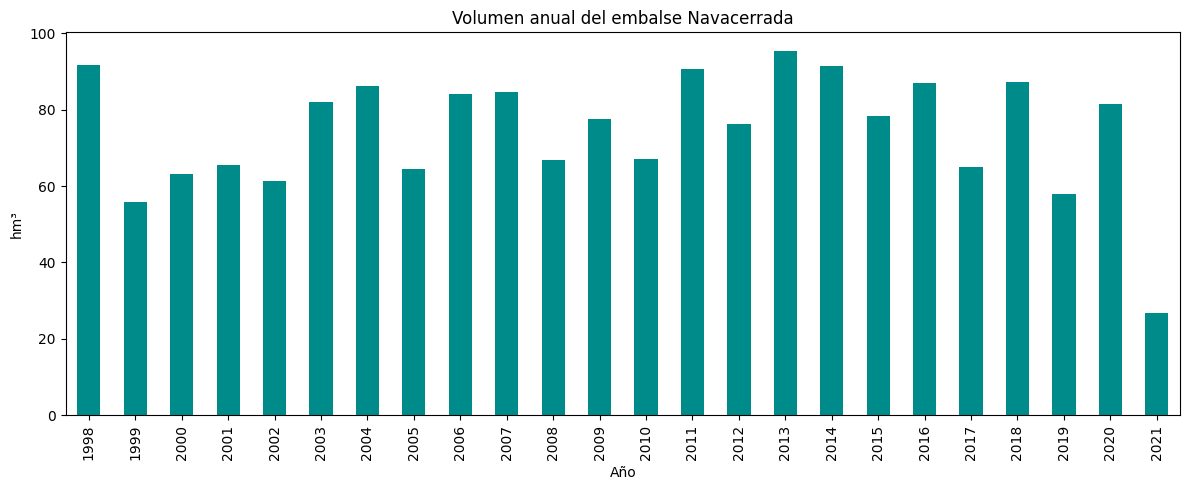

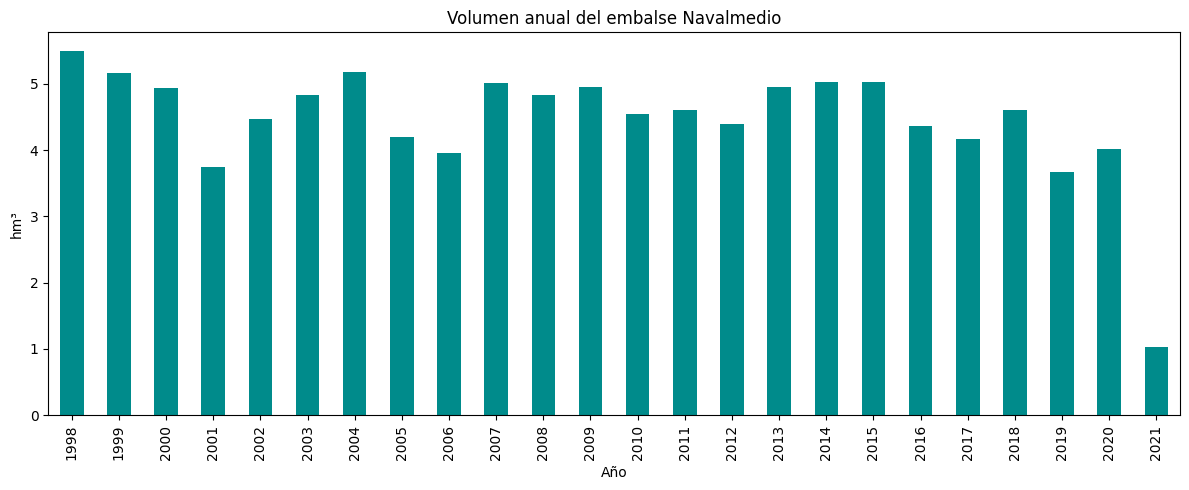

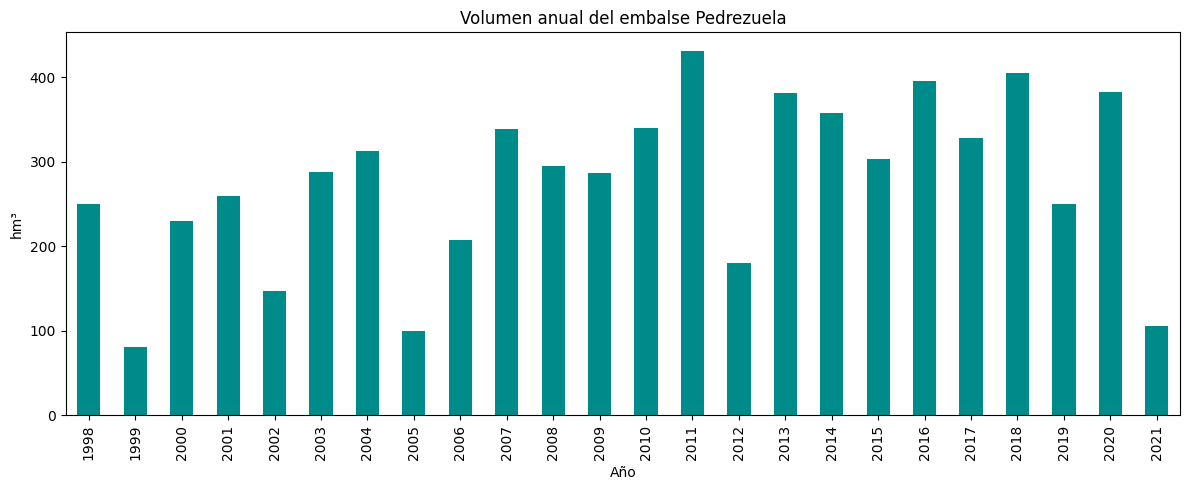

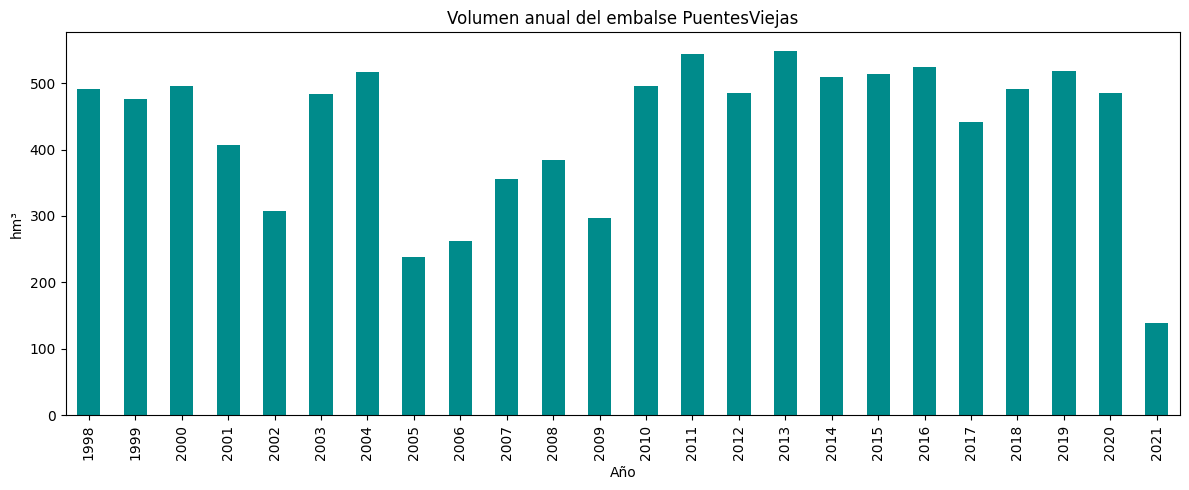

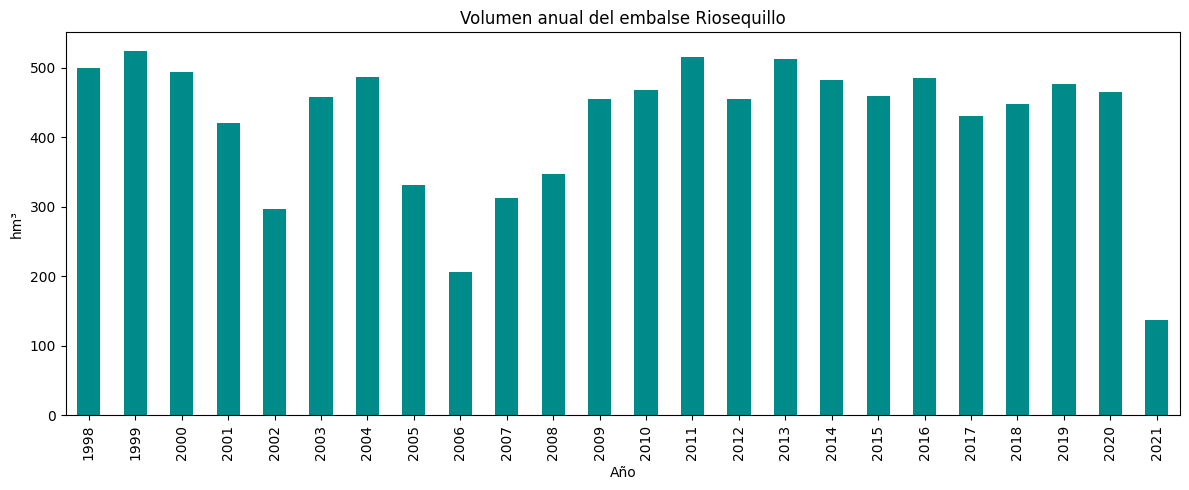

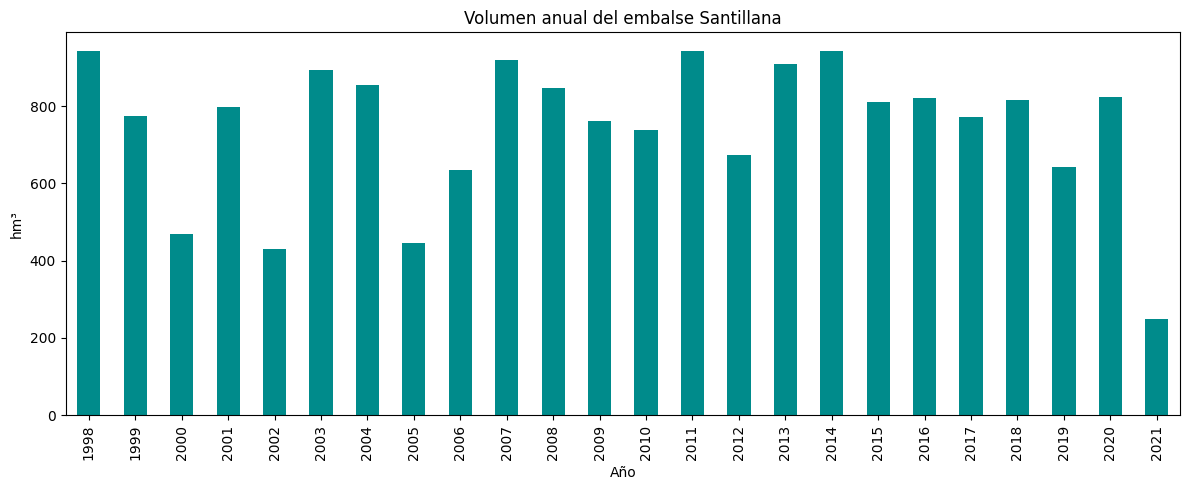

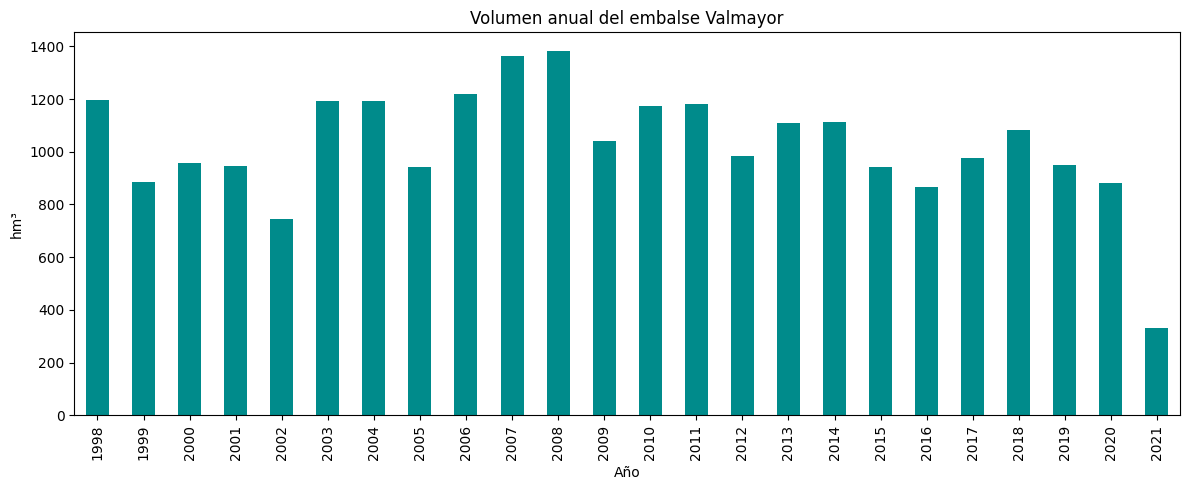

In [33]:
for embalse in columnas_embalses:
    plt.figure(figsize=(12, 5))

    df_pivotada_rellena.groupby("anio")[embalse].sum().plot(
        kind="bar", color="darkcyan"
    )

    plt.title(f"Volumen anual del embalse {embalse}")
    plt.xlabel("Año")
    plt.ylabel("hm³")
    plt.tight_layout()
    plt.show()


***Scatterplot: comparación de dos embalses***

Este gráfico, mediante una garfica de puntos, nos sirve para ver la dirección y relacion con el tiempo entre dos embalses, además, simplemente tu eliges los embalses que quieras en la aprte de codigo que esta claramente señalizada, ejemplo: ElAtazar vs Valmayor



```
embalse_a = "ElAtazar"
embalse_b = "Valmayor"
```



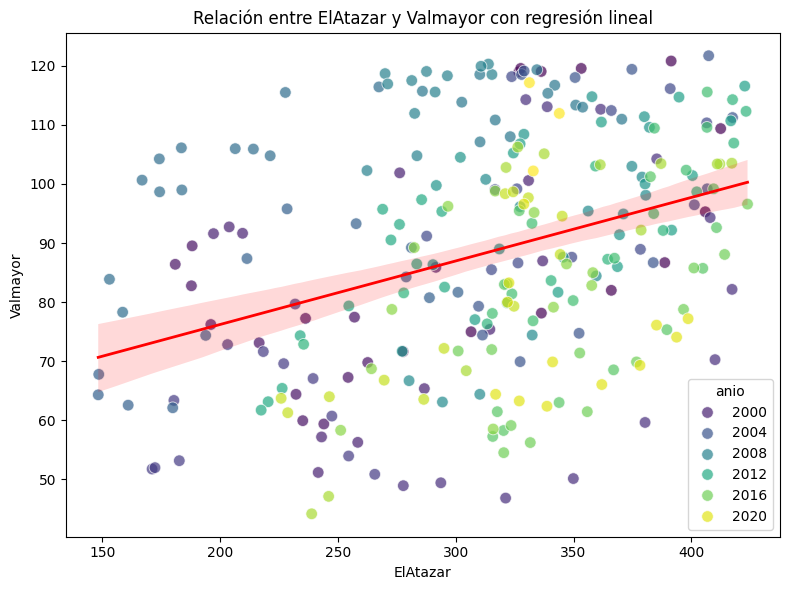

In [34]:
embalse_a = "ElAtazar"
embalse_b = "Valmayor"

plt.figure(figsize=(8, 6))

# Puntos
sns.scatterplot(
    data=df_pivotada,
    x=embalse_a,
    y=embalse_b,
    hue="anio",
    palette="viridis",
    alpha=0.7,
    s=70
)

# Línea de regresión lineal
sns.regplot(
    data=df_pivotada,
    x=embalse_a,
    y=embalse_b,
    scatter=False,       # No repetir los puntos
    color="red",         # Color de la recta
    line_kws={"linewidth": 2}
)

plt.title(f"Relación entre {embalse_a} y {embalse_b} con regresión lineal")
plt.xlabel(embalse_a)
plt.ylabel(embalse_b)
plt.tight_layout()
plt.show()



En este caso, vemos como los puntos con menos tonalidades de azul, se acumulan mas en los valores mas pequeños, y cuanto el color va escalando a los verdes y amarillos, mas se disparan los puntos a posiciones con mayor valor de agua acumulada.

De hechola forma más forma de verlo, es gracias a la linea roja, la cual es la tendencia lineal de los puntos, la cual puede indicar una de esta tres cosas:

* Si es ascendente → ambos embalses se llenan y vacían paralelamente.
* Si es plana → apenas están correlacionados.
* Si es descendente → uno sube mientras el otro baja.

En este caso, se ve como claramente hay una correlacón entre ellos.

***Violin Plot por año: distribución del total de agua embalsada***

Este gráfico, es muy util, ya que nos ayuda a poder ver de forma más grafica el volumne y la acumulacion que ha habiado de agua por cada año, viendo así como claramente, sobretodo a partir de 2006, hubo un aumento de retención de agua en los embalses sin bajar a niveles historicos medios.

C:\Users\PABLO PC\AppData\Local\Temp\ipykernel_6584\1063654630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


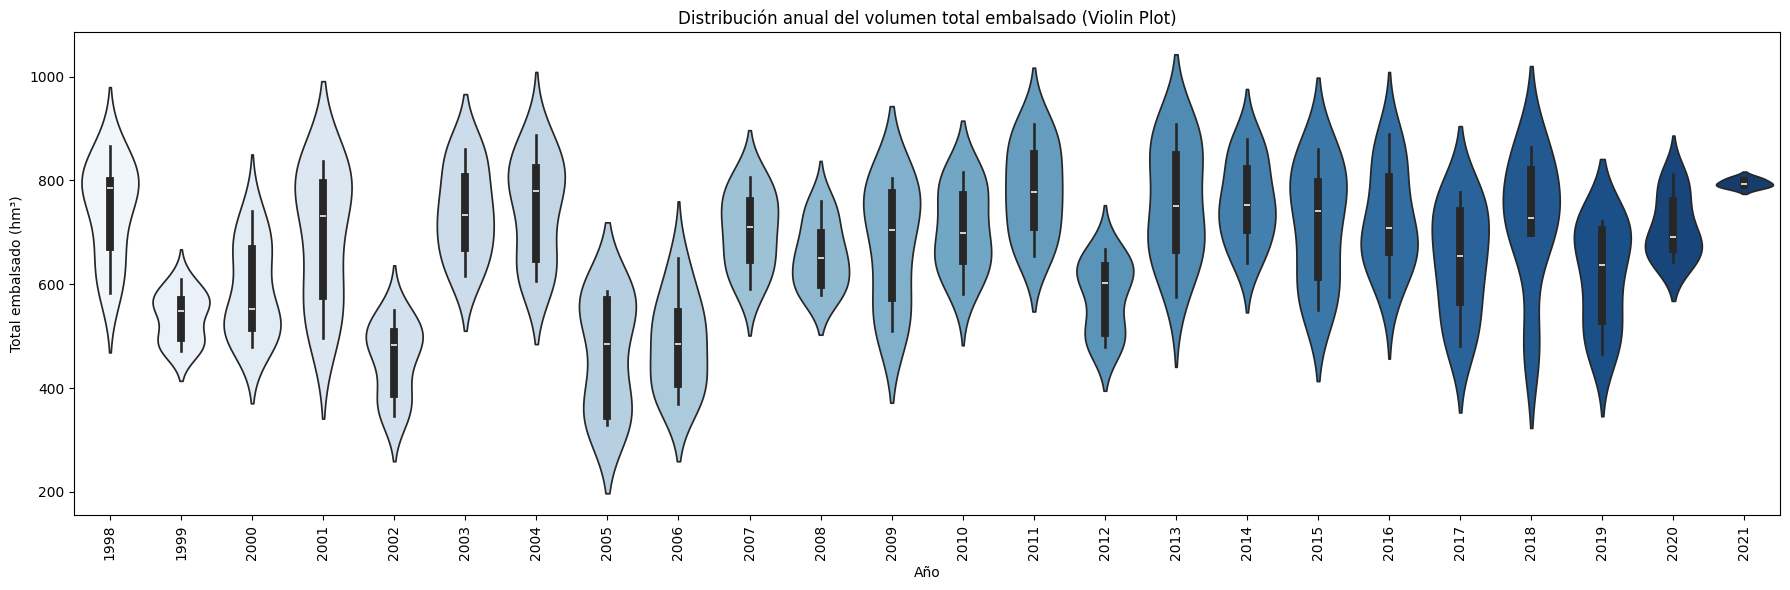

In [35]:
plt.figure(figsize=(18, 6))
sns.violinplot(
    data=df_pivotada_rellena,
    x="anio",
    y="total",
    palette="Blues"
)

plt.title("Distribución anual del volumen total embalsado (Violin Plot)")
plt.xlabel("Año")
plt.ylabel("Total embalsado (hm³)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Además, este gráfico muestra la “forma” de la distribución anual, señalando años con:

* Más variabilidad,

* Anomalías,

* Picos poco habituales.

***Violin Plot individual por embalse***

El gráfico de violín permite observar de forma clara la distribución histórica de los volúmenes embalsados en cada una de las presas

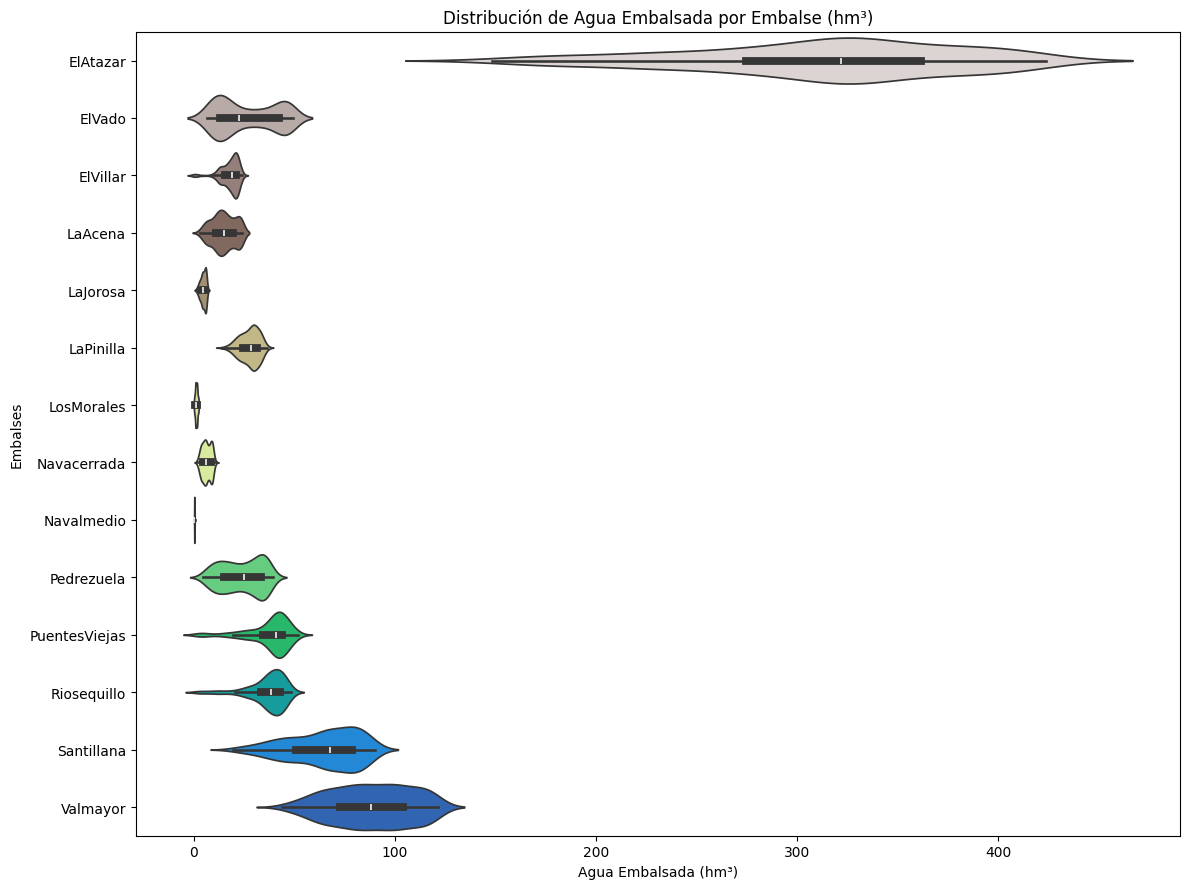

In [36]:

plt.figure(figsize=(12, 9))

sns.violinplot(
    data=df_pivotada_rellena[columnas_embalses],
    orient='h',                    # Horizontal
    palette="terrain_r"            # Igual que tu ejemplo
)

plt.title('Distribución de Agua Embalsada por Embalse (hm³)')
plt.xlabel('Agua Embalsada (hm³)')
plt.ylabel('Embalses')
plt.tight_layout()
plt.show()



Este gráfico, por su forma de verlo, muestra ***4 grupos*** principales, estructurados de la siguiente forma:

 **Grupo 1 — Embalses pequeños y muy estables**
    Navacerrada, Navalmedio, LosMorales, LaJorosa
    Presentan volúmenes muy bajos y distribuciones estrechas: apenas varían con el tiempo. Su impacto en el total es reducido.

**Grupo 2 — Embalses medianos con variabilidad moderada**

LaPinilla, Pedrezuela, LaAcena, ElVado, Riosequillo, PuentesViejas
Muestran más dispersión, con años de mínimos muy bajos y otros de mayor llenado. Variabilidad marcada por la estacionalidad.

**Grupo 3 — Embalses grandes y bastante variables**

Valmayor, Santillana
Registros amplios y dispersos: su capacidad mayor se refleja en curvas más extendidas y fluctuaciones anuales relevantes.

**Grupo 4 — El Atazar (caso excepcional)**

Embalse con diferencia más grande y variable del sistema. Su distribución es la más amplia, reflejando su papel dominante en el almacenamiento total.



## **Algoritmo de Prophet**

In [ ]:

df_pivotada_rellena[["fecha", "total"]].head()

#df_pivotada
df_pivotada_rellena.tail(5)

In [ ]:
# Guarda la versión actual del DataFrame
##df_pivotada_rellena.to_csv("df_embalses_limpio_final.csv", index=False, encoding="utf-8")

#files.download("df_embalses_medio_limpio.csv")

In [ ]:
df_pivotada_rellena

In [ ]:
df_pivotada_rellena.dtypes

In [ ]:
!pip uninstall -y prophet fbprophet cmdstanpy pystan



In [ ]:
!pip install prophet cmdstanpy -q
